# Taher Muhammedali - 0478012

## Assignment 3 - Task 3 - Data Science ESM

In [1]:
import pyomo.environ as pe
import pandas as pd
import pypsa as pyp
import warnings
warnings.filterwarnings("ignore")

### NOTE - Pypsa method done first, then Pyomo

In [2]:
# Creating dictionaries for Powerplants, Marginal Costs, Loads & Flows

In [3]:
power_plants = {
    "SA": {"coal": 35000, "wind": 3000, "gas": 8000, "oil": 2000},
    "MZ": {"hydro": 1200, "gas": 500},
    "ES": {"hydro": 600}
}

In [4]:
loads = {
    "SA": 42000,
    "MZ": 650,
    "ES": 250
}

In [5]:
marginal_costs = {
    "SA": {"coal": 30, "wind": 0, "gas": 60, "oil": 80, "hydro":0},
    "MZ": {"hydro": 3, "gas": 55, "coal": 0, "wind": 0, "oil": 0},
    "ES": {"hydro": 5, "gas": 0, "coal": 0, "wind": 0, "oil": 0}
}

In [6]:
flows = {
    "SA-MZ": 500,
    "MZ-ES": 100,
    "SA-ES": 250
}

In [7]:
technologies = [ 'coal','wind', 'oil', 'gas', 'hydro']

### (b) PYPSA Method

#### (i)

In [8]:
n = pyp.Network() # Creating empty network

#### (ii)

In [9]:
# Adding buses for each country
n.add("Bus", "SA")
n.add("Bus", "MZ")
n.add("Bus", "ES")

In [10]:
# Adding the list of generators
for key in power_plants.keys():
    for tech, p_nom in power_plants[key].items():
        n.add("Generator",
              f"{key} {tech}",
              bus=key,
              carrier=tech,
              p_nom=p_nom,
              marginal_cost=marginal_costs[key][tech]
              )
n.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
SA coal,SA,PQ,,35000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
SA wind,SA,PQ,,3000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
SA gas,SA,PQ,,8000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
SA oil,SA,PQ,,2000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
MZ hydro,MZ,PQ,,1200.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
MZ gas,MZ,PQ,,500.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
ES hydro,ES,PQ,,600.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [11]:
# Adding country demands
for key in power_plants.keys():
    n.add("Load",
          f"{key} electricity demand",
          bus=key,
          p_set=loads[key],
          carrier='electricity',
          )
n.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
SA electricity demand,SA,electricity,,42000.0,0.0,-1.0
MZ electricity demand,MZ,electricity,,650.0,0.0,-1.0
ES electricity demand,ES,electricity,,250.0,0.0,-1.0


In [12]:
# Adding transmission lines
for key in flows.keys():
    n.add("Line",
          f"{key}",
          bus0=key[:2],
          bus1=key[-2:],
          s_nom=flows[key],
          x=1
          )
n.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
SA-MZ,SA,MZ,,1.0,0.0,0.0,0.0,500.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MZ-ES,MZ,ES,,1.0,0.0,0.0,0.0,100.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SA-ES,SA,ES,,1.0,0.0,0.0,0.0,250.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### (iii)

In [13]:
n.lopf(solver_name='glpk') # Solving using glpk solver

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using glpk
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1259300.0
  Upper bound: 1259300.0
  Number of objectives: 1
  Number of constraints: 11
  Number of variables: 11
  Number of nonzeros: 23
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.03345346450805664
# ----------------------------------------------------------
#   Solution Information
# --------------------------

(<SolverStatus.ok: 'ok'>, <TerminationCondition.optimal: 'optimal'>)

#### (iv) Pypsa Results

In [14]:
print ("The generator dispatch for each powerplant is as follows (MW)")
pypsagen = n.generators_t.p
pypsagen

The generator dispatch for each powerplant is as follows (MW)


Generator,SA coal,SA wind,SA gas,SA oil,MZ hydro,MZ gas,ES hydro
snapshot,,,,,,,
now,35000.0,3000.0,3400.0,0.0,1100.0,0.0,400.0


In [15]:
print ("The power flows between countries is as follows (MW). Negative values means the flow is in opposite direction")
n.lines_t.p0

The power flows between countries is as follows (MW). Negative values means the flow is in opposite direction


Line,SA-MZ,MZ-ES,SA-ES
snapshot,,,
now,-350.0,100.0,-250.0


In [16]:
y = (n.generators_t.p * n.generators.marginal_cost)
pypsacost = sum(y.sum())/1e6
print ("The total cost of the system is %.4f million €" % pypsacost)

The total cost of the system is 1.2593 million €


In [17]:
print("The market price for each country is as follows (€/MWh)")
pypsaprice = n.buses_t.marginal_price
pypsaprice

The market price for each country is as follows (€/MWh)


Bus,SA,MZ,ES
snapshot,,,
now,60.0,3.0,5.0


### (a) Pyomo Method

In [45]:
# Creating an empty model and calling for shadow values and intializing sets
m = pe.ConcreteModel()
m.dual = pe.Suffix(direction=pe.Suffix.IMPORT)

In [46]:
m.countries = pe.Set(initialize=loads.keys())
m.technologies = pe.Set(initialize=technologies)

In [47]:
# Creating variable for Generator Dispatch
m.gendispatch = pe.Var(m.countries, m.technologies, within=pe.NonNegativeReals)

In [21]:
# Variable for each flow
m.f1 = pe.Var()
m.f2 = pe.Var()
m.f3 = pe.Var()

In [22]:
# Creating transmission constraint for each flow
m.sa_mo = pe.Constraint(expr=(-500, m.f1, 500))
m.mo_es = pe.Constraint(expr=(-100, m.f2, 100))
m.sa_es = pe.Constraint(expr=(-250, m.f3, 250))

m.sa_mo.pprint()
m.mo_es.pprint()
m.sa_es.pprint()

sa_mo : Size=1, Index=None, Active=True
    Key  : Lower  : Body : Upper : Active
    None : -500.0 :   f1 : 500.0 :   True
mo_es : Size=1, Index=None, Active=True
    Key  : Lower  : Body : Upper : Active
    None : -100.0 :   f2 : 100.0 :   True
sa_es : Size=1, Index=None, Active=True
    Key  : Lower  : Body : Upper : Active
    None : -250.0 :   f3 : 250.0 :   True


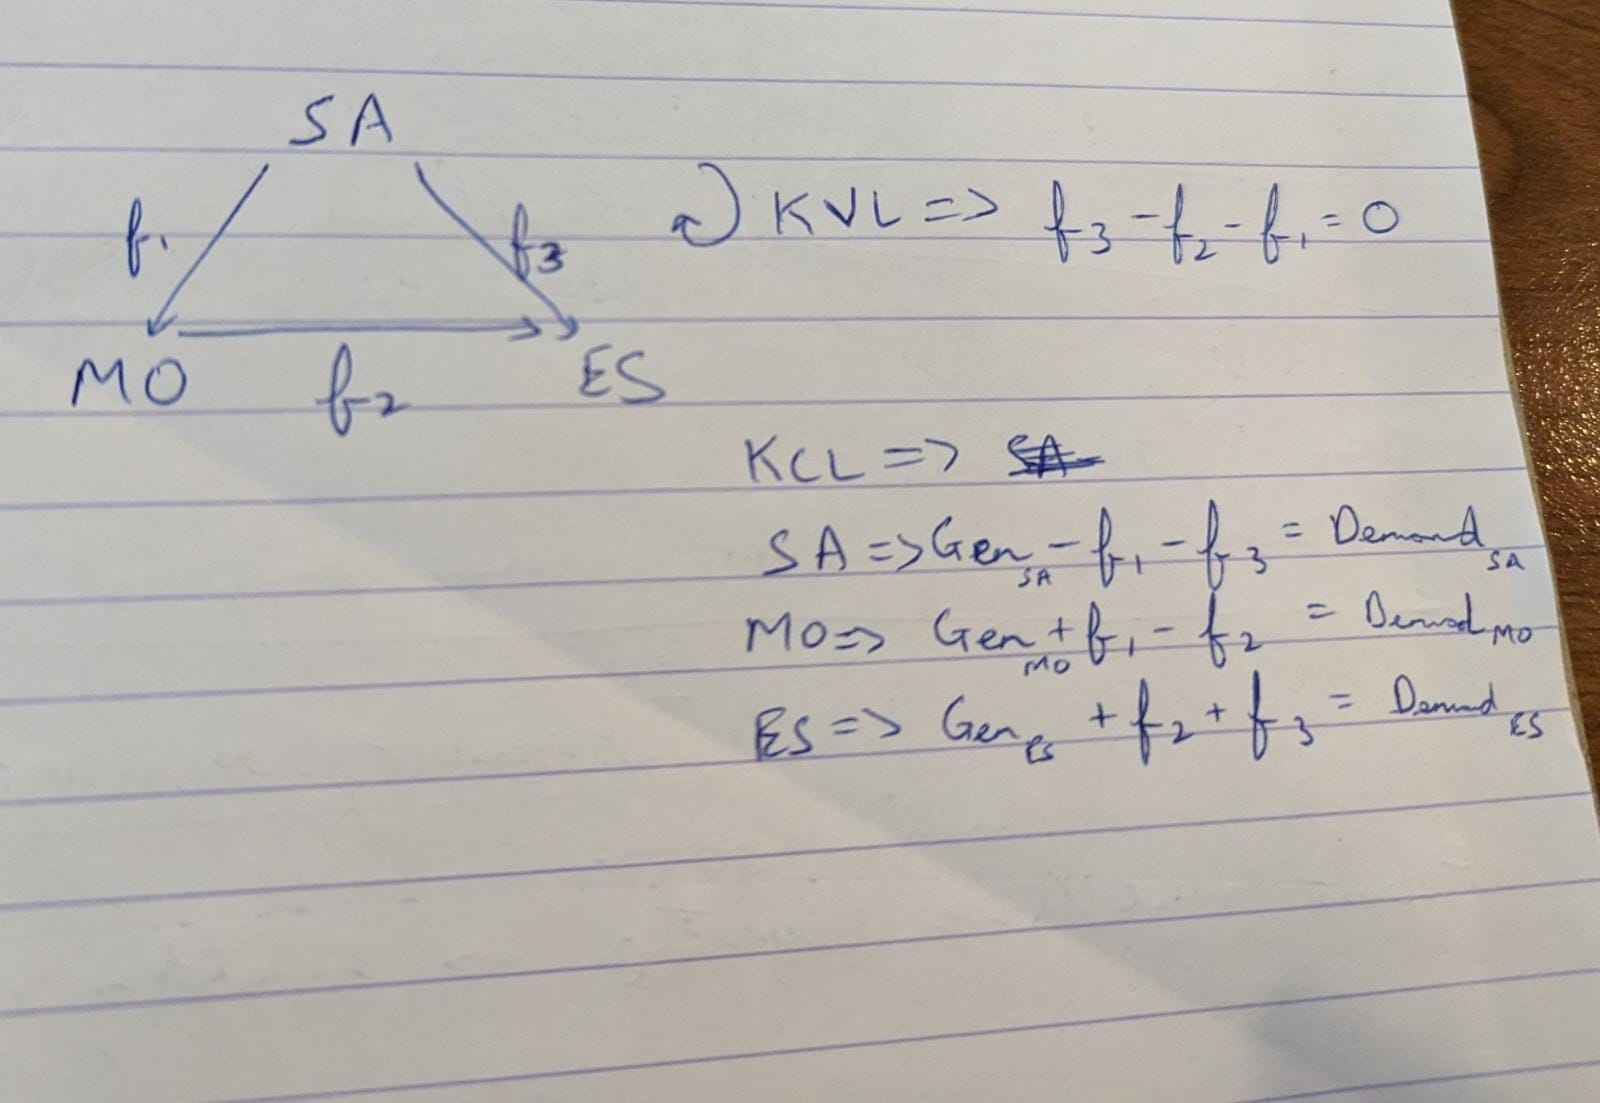

In [44]:
from IPython import display
display.Image("https://i.imgur.com/rfXTc7q.jpg", width=300, height=300)

Consider above diagram for the KVL & KCL constraints defined below

In [24]:
# Creating KCL constraints for each country
@m.Constraint(m.countries)
def kcl(m, c):
    if c == "SA":
        return sum(m.gendispatch[c,s] for s in m.technologies) - m.f1 - m.f3 == loads[c]
    if c == "MZ":
        return sum(m.gendispatch[c,s] for s in m.technologies) + m.f1 - m.f2 == loads[c]
    if c == "ES":
        return sum(m.gendispatch[c,s] for s in m.technologies) + m.f2 + m.f3 == loads[c]

m.kcl.pprint()

kcl : Size=3, Index=countries, Active=True
    Key : Lower   : Body                                                                                                                      : Upper   : Active
     ES :   250.0 : gendispatch[ES,coal] + gendispatch[ES,wind] + gendispatch[ES,oil] + gendispatch[ES,gas] + gendispatch[ES,hydro] + f2 + f3 :   250.0 :   True
     MZ :   650.0 : gendispatch[MZ,coal] + gendispatch[MZ,wind] + gendispatch[MZ,oil] + gendispatch[MZ,gas] + gendispatch[MZ,hydro] + f1 - f2 :   650.0 :   True
     SA : 42000.0 : gendispatch[SA,coal] + gendispatch[SA,wind] + gendispatch[SA,oil] + gendispatch[SA,gas] + gendispatch[SA,hydro] - f1 - f3 : 42000.0 :   True


In [25]:
# Creating KVL constraint for the system
m.kvl = pe.Constraint(expr= m.f3 - m.f2 -m.f1 == 0)
m.kvl.pprint()

kvl : Size=1, Index=None, Active=True
    Key  : Lower : Body         : Upper : Active
    None :   0.0 : f3 - f2 - f1 :   0.0 :   True


In [26]:
# Creating constraint for capacity for each generator
@m.Constraint(m.countries, m.technologies)
def generator_limit(m, c, s):
    return m.gendispatch[c,s] <= power_plants[c].get(s, 0)

m.generator_limit.pprint()

generator_limit : Size=15, Index=generator_limit_index, Active=True
    Key             : Lower : Body                  : Upper   : Active
     ('ES', 'coal') :  -Inf :  gendispatch[ES,coal] :     0.0 :   True
      ('ES', 'gas') :  -Inf :   gendispatch[ES,gas] :     0.0 :   True
    ('ES', 'hydro') :  -Inf : gendispatch[ES,hydro] :   600.0 :   True
      ('ES', 'oil') :  -Inf :   gendispatch[ES,oil] :     0.0 :   True
     ('ES', 'wind') :  -Inf :  gendispatch[ES,wind] :     0.0 :   True
     ('MZ', 'coal') :  -Inf :  gendispatch[MZ,coal] :     0.0 :   True
      ('MZ', 'gas') :  -Inf :   gendispatch[MZ,gas] :   500.0 :   True
    ('MZ', 'hydro') :  -Inf : gendispatch[MZ,hydro] :  1200.0 :   True
      ('MZ', 'oil') :  -Inf :   gendispatch[MZ,oil] :     0.0 :   True
     ('MZ', 'wind') :  -Inf :  gendispatch[MZ,wind] :     0.0 :   True
     ('SA', 'coal') :  -Inf :  gendispatch[SA,coal] : 35000.0 :   True
      ('SA', 'gas') :  -Inf :   gendispatch[SA,gas] :  8000.0 :   True
    ('SA'

In [27]:
# Creating objective function to minimize costs for the entire system
m.cost = pe.Objective(expr=sum(marginal_costs[c][s] * m.gendispatch[c,s] for s in m.technologies for c in m.countries))
m.cost.pprint()

cost : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 30*gendispatch[SA,coal] + 80*gendispatch[SA,oil] + 60*gendispatch[SA,gas] + 55*gendispatch[MZ,gas] + 3*gendispatch[MZ,hydro] + 5*gendispatch[ES,hydro]


In [28]:
pe.SolverFactory('glpk').solve(m).write() #Solving using glpk solver

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1259300.0
  Upper bound: 1259300.0
  Number of objectives: 1
  Number of constraints: 26
  Number of variables: 19
  Number of nonzeros: 46
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.03775835037231445
# ----------------------------------------------------------
#   Solution Information
# --------------------------

#### (v) Pyomo Results

In [29]:
print ("The generator dispatch for each powerplant is as follows (MW)")
pyomogen = pd.Series(m.gendispatch.get_values()).unstack()
pyomogen

The generator dispatch for each powerplant is as follows (MW)


,coal,gas,hydro,oil,wind
ES,0.0,0.0,400.0,0.0,0.0
MZ,0.0,0.0,1100.0,0.0,0.0
SA,35000.0,3400.0,0.0,0.0,3000.0


In [30]:
print ("The power flows between countries is as follows (MW). Negative values means the flow is in opposite direction")
print ("Flow between SA-MZ is %.0f MW " % m.f1())
print ("Flow between MZ-ES is %.0f MW " % m.f2())
print ("Flow between SA-ES is %.0f MW " % m.f3())

The power flows between countries is as follows (MW). Negative values means the flow is in opposite direction
Flow between SA-MZ is -350 MW 
Flow between MZ-ES is 100 MW 
Flow between SA-ES is -250 MW 


In [31]:
pyomocost = m.cost() / 1e6
print ("The total cost of the system is %.4f million €" % pyomocost)

The total cost of the system is 1.2593 million €


In [39]:
print("The market price for each country is as follows (€/MWh)")
pyomoprice = pd.Series(m.dual.values(), m.dual.keys()).head(3)
pyomoprice

The market price for each country is as follows (€/MWh)


kcl[ES]     5.0
kcl[MZ]     3.0
kcl[SA]    60.0
dtype: float64

### (c)

From the below we can see that both Pypsa and Pyomo give us the exact same generator dispatch for all countries and technologies

In [33]:
pypsagen

Generator,SA coal,SA wind,SA gas,SA oil,MZ hydro,MZ gas,ES hydro
snapshot,,,,,,,
now,35000.0,3000.0,3400.0,0.0,1100.0,0.0,400.0


In [34]:
pyomogen

,coal,gas,hydro,oil,wind
ES,0.0,0.0,400.0,0.0,0.0
MZ,0.0,0.0,1100.0,0.0,0.0
SA,35000.0,3400.0,0.0,0.0,3000.0


Below we can see both Pypsa and Pyomo result in the exact same total cost of minimizing the operational costs using an if statement to confirm

In [48]:
if pypsacost == pyomocost:
    print ("The total cost of the system is %.4f million €" % pyomocost)

The total cost of the system is 1.2593 million €


Below we can see even the market prices for all countries using both methods is the same as well

In [36]:
pypsaprice

Bus,SA,MZ,ES
snapshot,,,
now,60.0,3.0,5.0


In [40]:
pyomoprice

kcl[ES]     5.0
kcl[MZ]     3.0
kcl[SA]    60.0
dtype: float64